# Crop row detection

In [1]:
# Imports
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

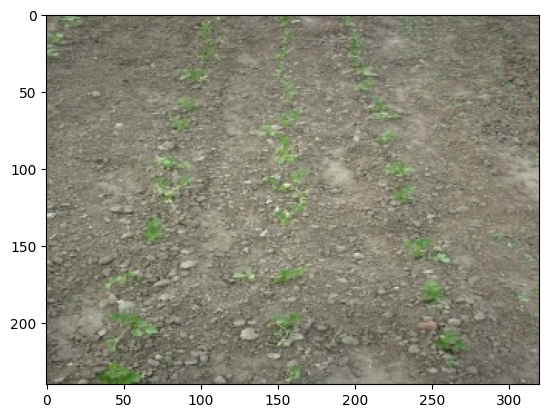

In [2]:
# Load images
image = cv2.imread('../../data/crop_field.jpg')

# Converting RGB image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

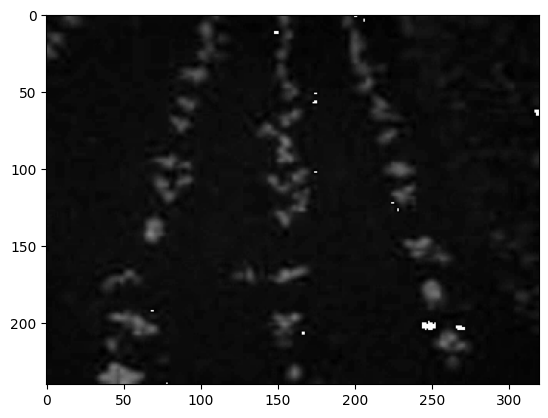

In [3]:
# We define our own gryscale image where we accentuate the green color
b, g, r = cv2.split(image)
gray = 2 * g - r - b

# Show image
plt.imshow(gray, cmap='gray')
plt.show()

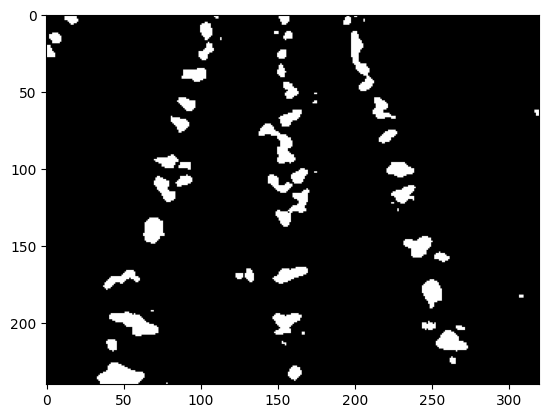

In [4]:
# Threshold
ret, image_edit = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Show image
plt.imshow(image_edit, cmap='gray')
plt.show()

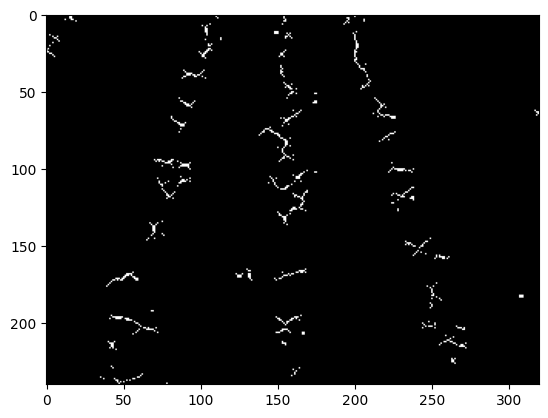

In [5]:
# Skeletonization
size = np.size(gray)
skel = np.zeros(gray.shape, np.uint8)

# Skeletonize
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
done = False
while not done:
    eroded = cv2.erode(image_edit, element)
    temp = cv2.dilate(eroded, element)
    temp = cv2.subtract(image_edit, temp)
    skel = cv2.bitwise_or(skel, temp)
    image_edit = eroded.copy()
    zeros = size - cv2.countNonZero(image_edit)
    if zeros == size:
        done = True

# Shop
plt.imshow(skel, cmap='gray')
plt.show()


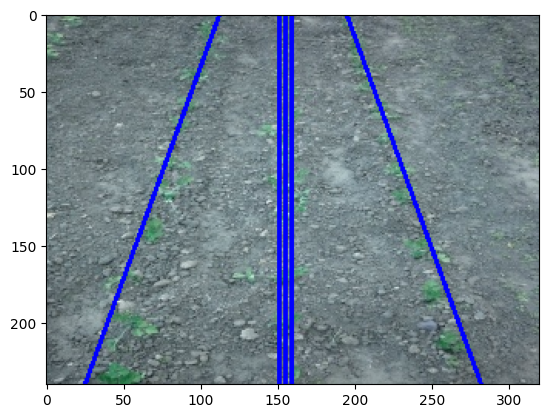

In [6]:
# Hough params
HOUGH_RHO = 2  # Distance resolution of the accumulator in pixels
HOUGH_ANGLE = math.pi * 10.0 / 180  # Angle resolution of the accumulator in radians
HOUGH_THRESHOLD = 30 # Value from which the line is selected in the accumulator

# Detect lines
crop_line_data_1 = cv2.HoughLines(skel, HOUGH_RHO, HOUGH_ANGLE, HOUGH_THRESHOLD)

# Plot lines
result = image.copy()
for line in crop_line_data_1:
    theta = line[0][1]
    rho = line[0][0]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    point1 = (int(round(x0 + 1000 * (-b))), int(round(y0 + 1000 * a)))
    point2 = (int(round(x0 - 1000 * (-b))), int(round(y0 - 1000 * a)))
    result = cv2.line(result, point1, point2, (0, 0, 255), 2)

# Show image
plt.imshow(result)
plt.show()